In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Solve the Monty Hall Problem via Simulations

In [3]:
# this is just a list but is not a vector or array
doors = ['goat', 'goat', 'car']

In [14]:
# vectors must have numeric values
v = np.array([1,2,3])

In [16]:
v+v

array([2, 4, 6])

In [7]:
# how to randomly pick one of the doors?
np.random.shuffle(doors)
doors[0]

'car'

In [13]:
# how to frequently are you winning the car if you stick with your original choice?
stick_wins = 0
switch_wins = 0
n = 10000
for _ in range(n):
    np.random.shuffle(doors)
    if doors[0]=='car':
        stick_wins += 1
    else:
        switch_wins += 1
print("The experimental probability for winning by stick to the original choice is "+str(stick_wins/n))
print("The experimental probability for winning by switching the original choice is "+str(switch_wins/n))

The experimental probability for winning by stick to the original choice is 0.3273
The experimental probability for winning by switching the original choice is 0.6727


## Use Monte Carlo Simulations to Estimate the irrational number $\pi$

In [26]:
# the main idea is to think of a circle of radius 1 inscribed in a square of side of length 2
# We are going to throw darts at the square and count how many land also inside the circle
hits_inside_circle = 0
n = 10000000
for _ in range(n):
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    if x**2+y**2<=1:
        hits_inside_circle += 1
print('The MC approximation of pi is :'+str(4*hits_inside_circle/n))

The MC approximation of pi is :3.1408304


In [19]:
x

-0.530679199007539

## Examples with Normality Tests

In [28]:
# when do we have to consider a normality test?
# when you make predictions for a continous random variable
# we need to generate some residuals from a regressor and check their normality
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from scipy.stats import norm, kstest, anderson, shapiro

In [29]:
# we need some data to work with
url = 'https://github.com/dvasiliu/AML/blob/main/Data%20Sets/concrete.csv?raw=true'
data = pd.read_csv(url)

In [30]:
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [31]:
x = data.drop(columns='strength').values
y = data['strength'].values

In [33]:
model = Ridge(alpha=0.01)
model.fit(x,y)

Ridge(alpha=0.01)

In [34]:
errors = y - model.predict(x)

(array([ 29.,  46.,  95., 206., 228., 241., 119.,  54.,  10.,   2.]),
 array([-28.65420258, -22.34379977, -16.03339697,  -9.72299417,
         -3.41259136,   2.89781144,   9.20821424,  15.51861705,
         21.82901985,  28.13942265,  34.44982546]),
 <BarContainer object of 10 artists>)

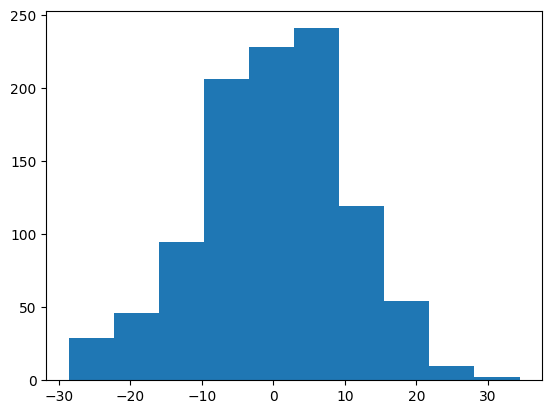

In [36]:
plt.hist(errors)